In [1]:
import math

class VEBTree:
    def __init__(self, u):
        self.u = u
        self.min = None
        self.max = None
        if u <= 2:
            self.summary = None
            self.cluster = None
        else:
            self.lower_sqrt_u = 2 ** (math.floor(math.log2(u) / 2))
            self.upper_sqrt_u = 2 ** (math.ceil(math.log2(u) / 2))
            self.summary = VEBTree(self.upper_sqrt_u)
            self.cluster = [VEBTree(self.lower_sqrt_u) for _ in range(self.upper_sqrt_u)]

    def high(self, x):
        return x // self.lower_sqrt_u

    def low(self, x):
        return x % self.lower_sqrt_u

    def index(self, high, low):
        return high * self.lower_sqrt_u + low

    def empty_insert(self, x):
        self.min = self.max = x

    def insert(self, x):
        if self.min is None:
            self.empty_insert(x)
        else:
            if x < self.min:
                x, self.min = self.min, x
            if self.u > 2:
                h = self.high(x)
                l = self.low(x)
                if self.cluster[h].min is None:
                    self.summary.insert(h)
                    self.cluster[h].empty_insert(l)
                else:
                    self.cluster[h].insert(l)
            if x > self.max:
                self.max = x

    def member(self, x):
        if x == self.min or x == self.max:
            return True
        elif self.u == 2:
            return False
        else:
            return self.cluster[self.high(x)].member(self.low(x))

    def minimum(self):
        return self.min

    def maximum(self):
        return self.max

    def successor(self, x):
        if self.u == 2:
            if x == 0 and self.max == 1:
                return 1
            else:
                return None
        elif self.min is not None and x < self.min:
            return self.min
        else:
            h = self.high(x)
            l = self.low(x)
            max_low = self.cluster[h].maximum() if self.cluster[h] else None
            if max_low is not None and l < max_low:
                offset = self.cluster[h].successor(l)
                return self.index(h, offset)
            else:
                succ_cluster = self.summary.successor(h)
                if succ_cluster is None:
                    return None
                else:
                    offset = self.cluster[succ_cluster].minimum()
                    return self.index(succ_cluster, offset)

    def predecessor(self, x):
        if self.u == 2:
            if x == 1 and self.min == 0:
                return 0
            else:
                return None
        elif self.max is not None and x > self.max:
            return self.max
        else:
            h = self.high(x)
            l = self.low(x)
            min_low = self.cluster[h].minimum() if self.cluster[h] else None
            if min_low is not None and l > min_low:
                offset = self.cluster[h].predecessor(l)
                return self.index(h, offset)
            else:
                pred_cluster = self.summary.predecessor(h)
                if pred_cluster is None:
                    if self.min is not None and x > self.min:
                        return self.min
                    else:
                        return None
                else:
                    offset = self.cluster[pred_cluster].maximum()
                    return self.index(pred_cluster, offset)

    def delete(self, x):
        if self.min == self.max:
            self.min = self.max = None
        elif self.u == 2:
            if x == 0:
                self.min = 1
            else:
                self.min = 0
            self.max = self.min
        else:
            if x == self.min:
                first_cluster = self.summary.minimum()
                if first_cluster is None:
                    self.min = self.max
                    return
                x = self.index(first_cluster, self.cluster[first_cluster].minimum())
                self.min = x
            h = self.high(x)
            l = self.low(x)
            self.cluster[h].delete(l)
            if self.cluster[h].min is None:
                self.summary.delete(h)
                if x == self.max:
                    summary_max = self.summary.maximum()
                    if summary_max is None:
                        self.max = self.min
                    else:
                        self.max = self.index(summary_max, self.cluster[summary_max].maximum())
            elif x == self.max:
                self.max = self.index(h, self.cluster[h].maximum())

In [5]:
def test_veb_tree():
    print("Starting vEB Tree tests...")

    veb = VEBTree(16)
    data = [3, 5, 2, 10, 8]
    for x in data:
        veb.insert(x)

    # Basic correctness
    print(" - Testi basic correctness...")
    assert veb.minimum() == 2, "Minimum should be 2"
    assert veb.maximum() == 10, "Maximum should be 10"
    assert veb.member(3) is True, "3 should be a member"
    assert veb.member(7) is False, "7 should not be a member"
    assert veb.successor(5) == 8, "Successor of 5 should be 8"
    assert veb.successor(10) is None, "10 has no successor"
    assert veb.predecessor(5) == 3, "Predecessor of 5 should be 3"
    assert veb.predecessor(2) is None, "2 has no predecessor"

    # Test deleting elements
    print(" - Test deleting elements...")
    veb.delete(10)
    assert veb.maximum() == 8, "After deleting 10, max should be 8"
    veb.delete(2)
    assert veb.minimum() == 3, "After deleting 2, min should be 3"
    veb.delete(3)
    assert veb.member(3) is False, "After deletion, 3 should not exist"

    # Edge cases: inserting 0 and 15
    print(" - Test edge cases...")
    veb.insert(0)
    veb.insert(15)
    assert veb.minimum() == 0, "After inserting 0, min should be 0"
    assert veb.maximum() == 15, "After inserting 15, max should be 15"
    assert veb.successor(8) == 15, "Successor of 8 should be 15"
    assert veb.predecessor(8) == 5, "Predecessor of 8 should be 5"

    # Bulk insert test: 0 to 15
    print(" - Test bulk insert...")
    veb_all = VEBTree(16)
    for x in range(16):
        veb_all.insert(x)
    for x in range(16):
        assert veb_all.member(x) is True, f"{x} should be in the tree"

    # Bulk delete all elements
    for x in range(16):
        veb_all.delete(x)
    assert veb_all.minimum() is None, "Tree should be empty after all deletions"
    assert veb_all.maximum() is None, "Tree should be empty after all deletions"

    print("All tests passed successfully.")

test_veb_tree()

Starting vEB Tree tests...
 - Testi basic correctness...
 - Test deleting elements...
 - Test edge cases...
 - Test bulk insert...
All tests passed successfully.


In [6]:
class BSTNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BSTree:
    def __init__(self):
        self.root = None

    def insert(self, key):
        if self.root is None:
            self.root = BSTNode(key)
        else:
            self._insert(self.root, key)

    def _insert(self, node, key):
        if key < node.key:
            if node.left is None:
                node.left = BSTNode(key)
            else:
                self._insert(node.left, key)
        else:
            if node.right is None:
                node.right = BSTNode(key)
            else:
                self._insert(node.right, key)

    def member(self, key):
        return self._member(self.root, key)

    def _member(self, node, key):
        if node is None:
            return False
        if key == node.key:
            return True
        elif key < node.key:
            return self._member(node.left, key)
        else:
            return self._member(node.right, key)

In [7]:
import time
import random
import matplotlib.pyplot as plt

def benchmark_insert(tree_type, elements):
    start = time.perf_counter()
    if tree_type == 'veb':
        tree = VEBTree(2 ** (len(bin(max(elements))) - 2))  # Smallest power of 2 covering max element
        for el in elements:
            tree.insert(el)
    elif tree_type == 'bst':
        tree = BSTree()
        for el in elements:
            tree.insert(el)
    end = time.perf_counter()
    return end - start

def benchmark_member(tree, elements):
    start = time.perf_counter()
    for el in elements:
        tree.member(el)
    end = time.perf_counter()
    return end - start

def run_benchmarks():
    sizes = [10, 50, 100, 500, 1000, 2000]
    veb_insert_times = []
    bst_insert_times = []

    veb_search_times = []
    bst_search_times = []

    for size in sizes:
        elements = random.sample(range(0, size * 10), size)

        # Benchmark insertion
        veb_insert_times.append(benchmark_insert('veb', elements))
        bst_insert_times.append(benchmark_insert('bst', elements))

        # Build trees for membership tests
        veb_tree = VEBTree(2 ** (len(bin(max(elements))) - 2))
        for el in elements:
            veb_tree.insert(el)

        bst_tree = BSTree()
        for el in elements:
            bst_tree.insert(el)

        # Benchmark membership
        search_elements = random.choices(elements, k=size)
        veb_search_times.append(benchmark_member(veb_tree, search_elements))
        bst_search_times.append(benchmark_member(bst_tree, search_elements))

    return sizes, veb_insert_times, bst_insert_times, veb_search_times, bst_search_times

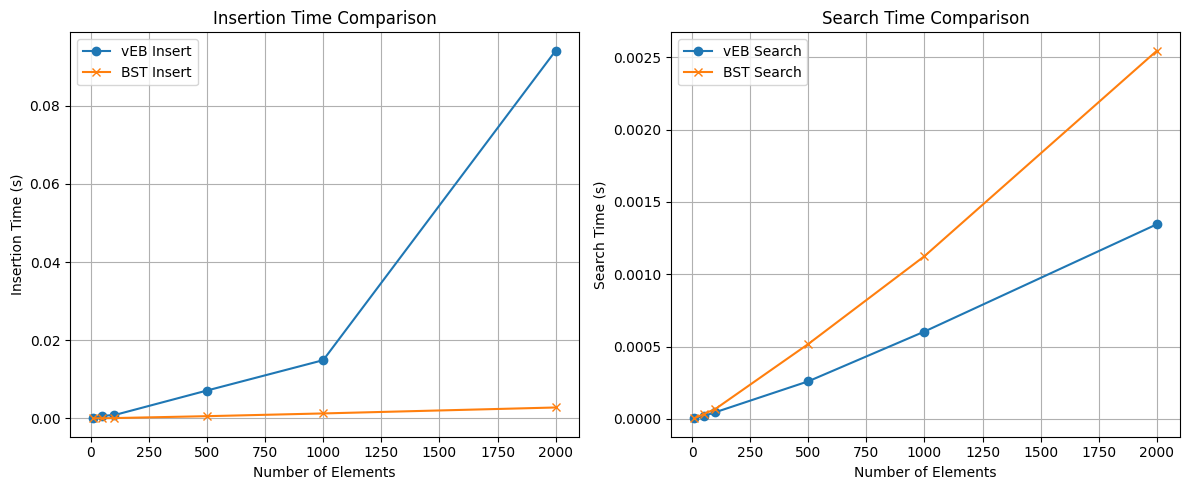

In [10]:
def plot_results(sizes, veb_insert, bst_insert, veb_search, bst_search):
    plt.figure(figsize=(12, 5))

    # Insert performance
    plt.subplot(1, 2, 1)
    plt.plot(sizes, veb_insert, marker='o', label='vEB Insert')
    plt.plot(sizes, bst_insert, marker='x', label='BST Insert')
    plt.xlabel('Number of Elements')
    plt.ylabel('Insertion Time (s)')
    plt.title('Insertion Time Comparison')
    plt.legend()
    plt.grid(True)

    # Member (search) performance
    plt.subplot(1, 2, 2)
    plt.plot(sizes, veb_search, marker='o', label='vEB Search')
    plt.plot(sizes, bst_search, marker='x', label='BST Search')
    plt.xlabel('Number of Elements')
    plt.ylabel('Search Time (s)')
    plt.title('Search Time Comparison')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main run
sizes, veb_insert, bst_insert, veb_search, bst_search = run_benchmarks()
plot_results(sizes, veb_insert, bst_insert, veb_search, bst_search)